In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline

Признаки.
1. Количественные.
2. Категориальные.
3. Бинарные.




In [2]:
df = pd.read_csv('data/telecom_churn.csv')


In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## 1. Признаки по одному
### 1.1. Количественные

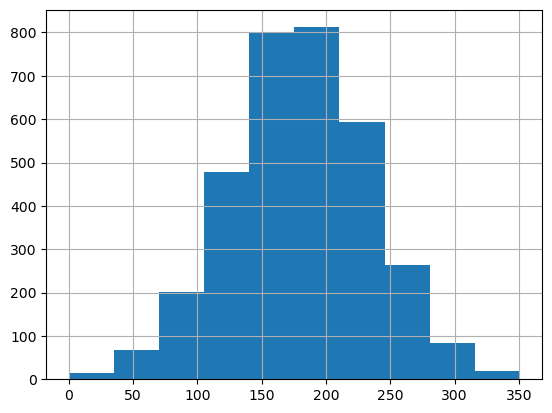

In [4]:
df['Total day minutes'].hist();

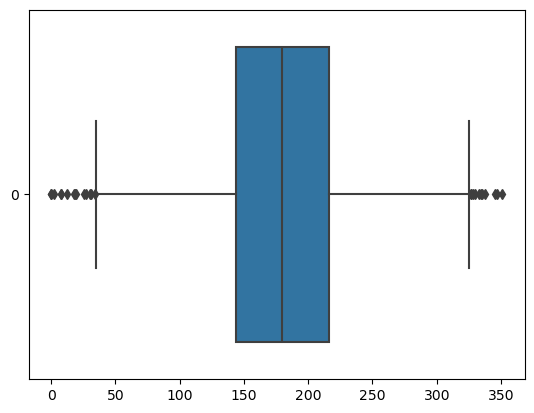

In [5]:
sns.boxplot(df['Total day minutes'], orient='h');

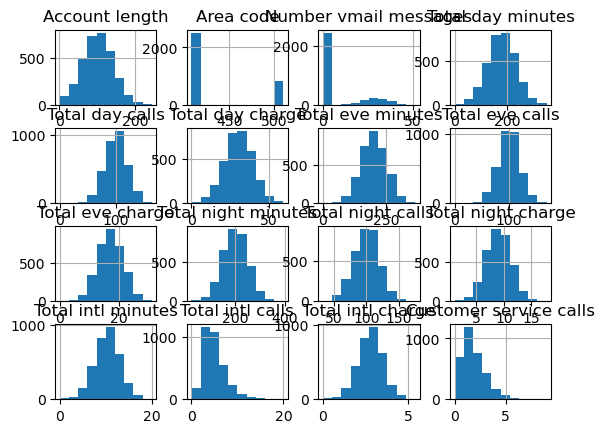

In [6]:
df.hist();

### 1.2. Категориальные.

In [7]:
df['State'].value_counts().head()

State
WV    106
MN     84
NY     83
AL     80
WI     78
Name: count, dtype: int64

In [8]:
df['Churn'].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

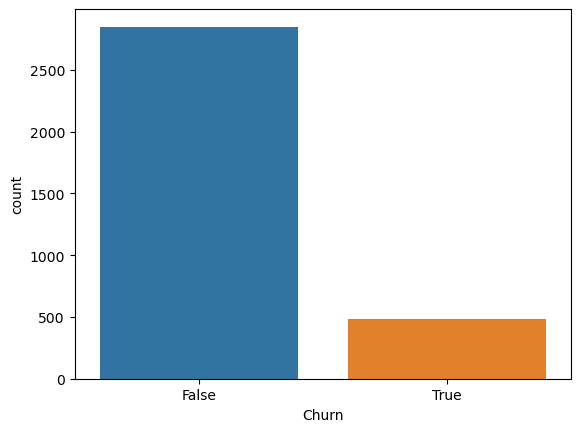

In [9]:
sns.countplot(data=df, x='Churn');

<Axes: xlabel='State', ylabel='count'>

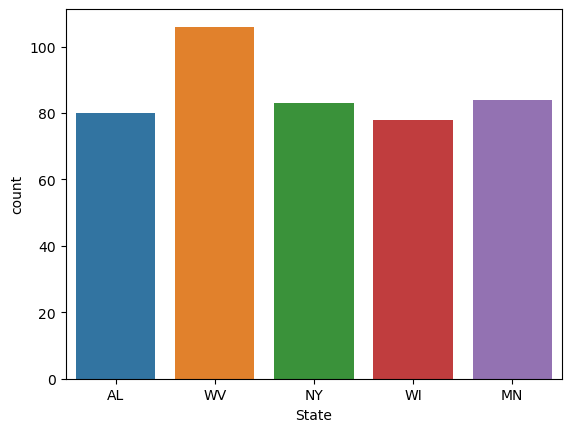

In [10]:
df[df['State'].isin(df['State'].value_counts().head().index)]
sns.countplot(data=df[df['State'].isin(df['State'].value_counts().head().index)], x='State')

## Взаимодействие признаков.

#### 2.1. Количественные с количественными.

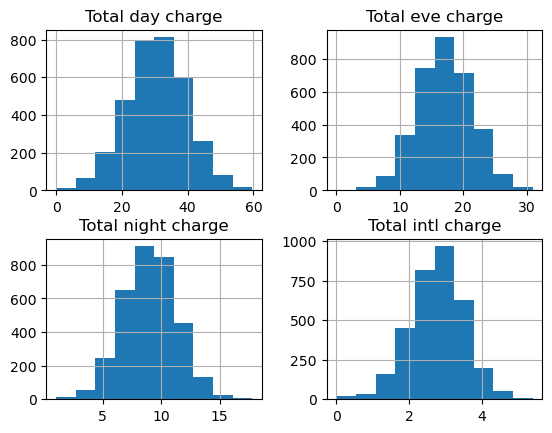

In [11]:
feat = [f for f in df.columns if 'charge' in f]

df[feat].hist();

c:\Users\lorex\anaconda3\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lorex\anaconda3\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lorex\anaconda3\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lorex\anaconda3\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

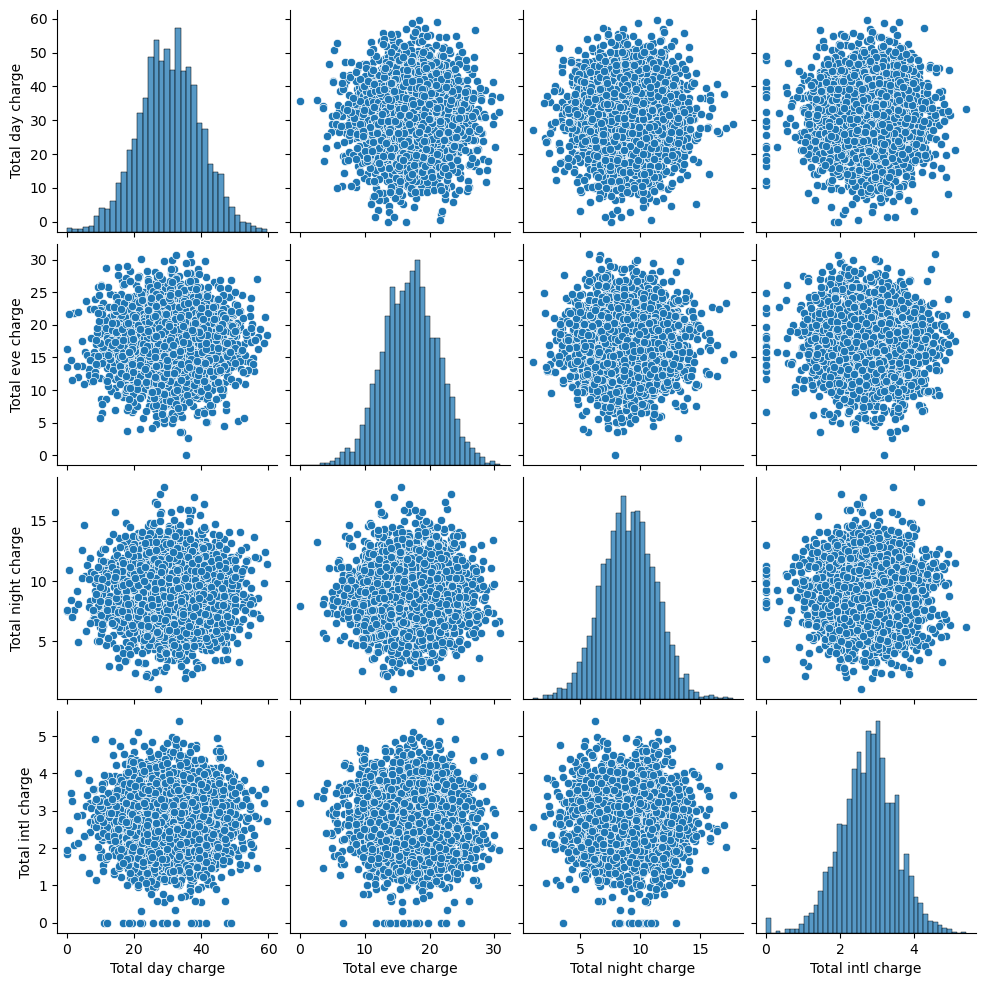

In [12]:
sns.pairplot(data=df[feat]);

In [13]:
df['Churn'].map({False: "blue", True: "Orange"}).head()

0    blue
1    blue
2    blue
3    blue
4    blue
Name: Churn, dtype: object

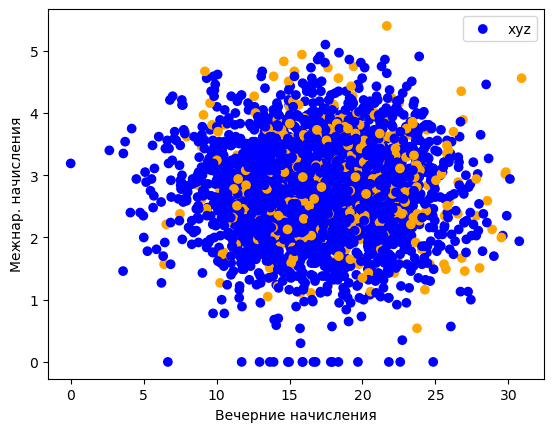

In [14]:
plt.scatter(df['Total eve charge'], df['Total intl charge'],
            color=df['Churn'].map({False: "blue", True: "Orange"}),
            label='xyz')
plt.xlabel('Вечерние начисления')
plt.ylabel("Межнар. начисления")
plt.legend()

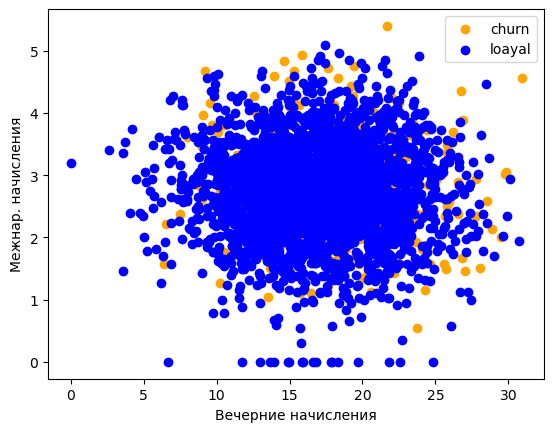

In [15]:
plt.scatter(df[df['Churn']]['Total eve charge'], df[df['Churn']]['Total intl charge'],
            color="Orange",
            label='churn')
plt.scatter(df[~df['Churn']]['Total eve charge'], df[~df['Churn']]['Total intl charge'],
            color="blue",
            label='loayal')

plt.xlabel('Вечерние начисления')
plt.ylabel("Межнар. начисления")
plt.legend()

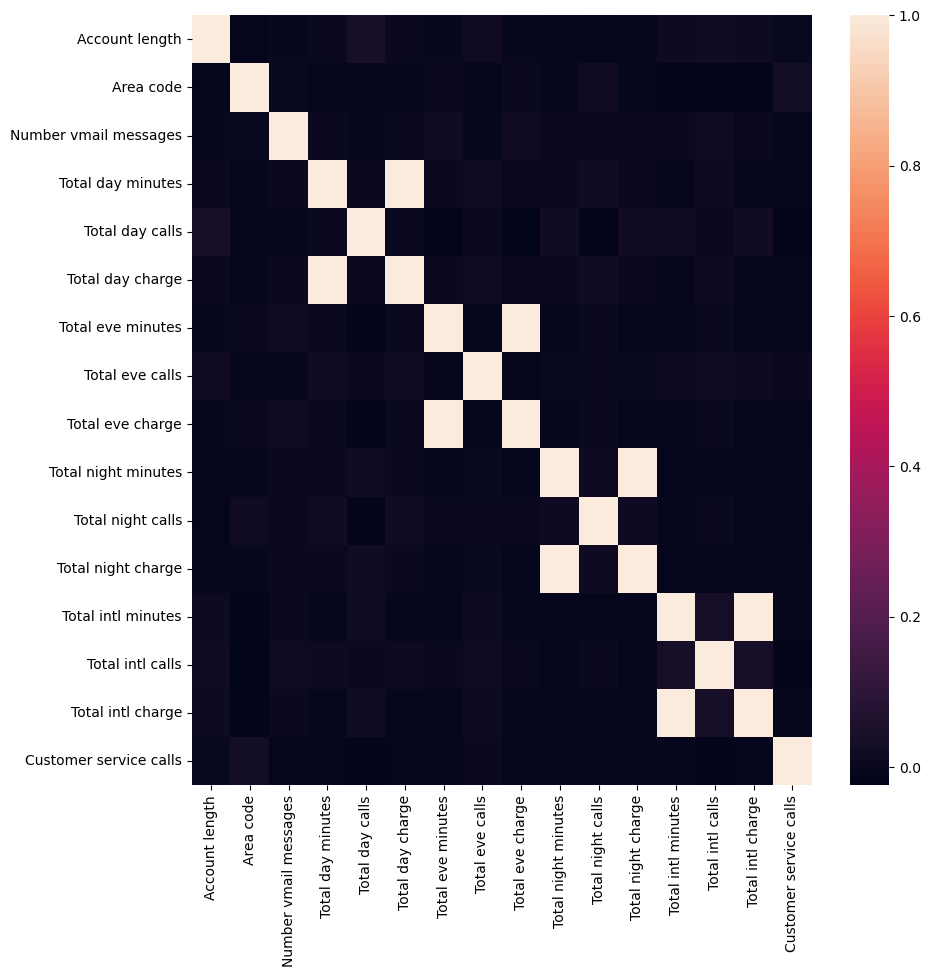

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(['int64', 'float64']).corr());

In [17]:
df.drop(feat, axis=1).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


#### 2.2. Количественные с дискретными.

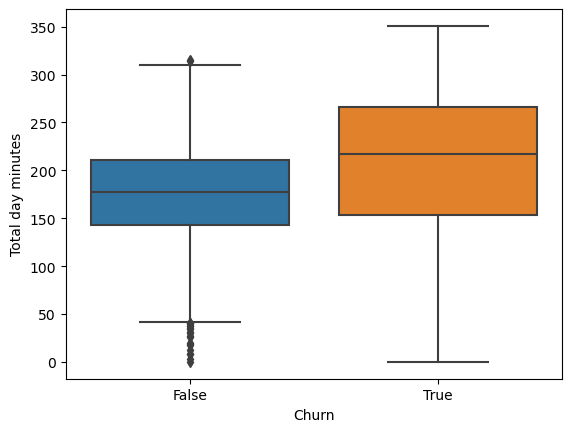

In [18]:
sns.boxplot(data=df, x='Churn', y='Total day minutes');

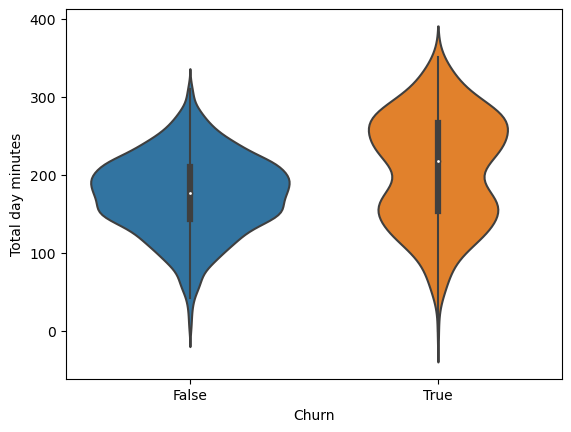

In [19]:
sns.violinplot(data=df, x='Churn', y='Total day minutes');

In [20]:
df.groupby('International plan')['Total day minutes'].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

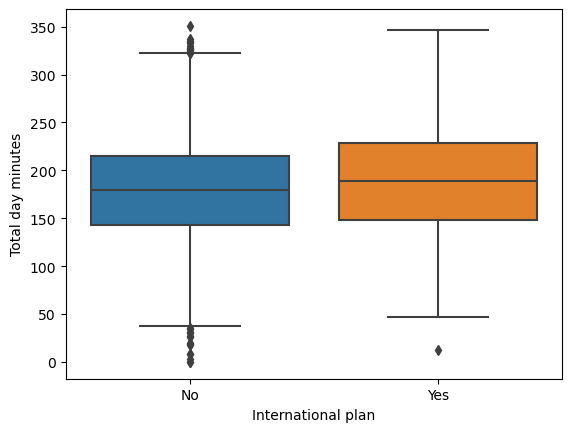

In [21]:
sns.boxplot(data=df, x='International plan', y='Total day minutes');


#### 2.3. Категориальные с категориальными.

In [22]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


AttributeError: 'numpy.bool_' object has no attribute 'startswith'

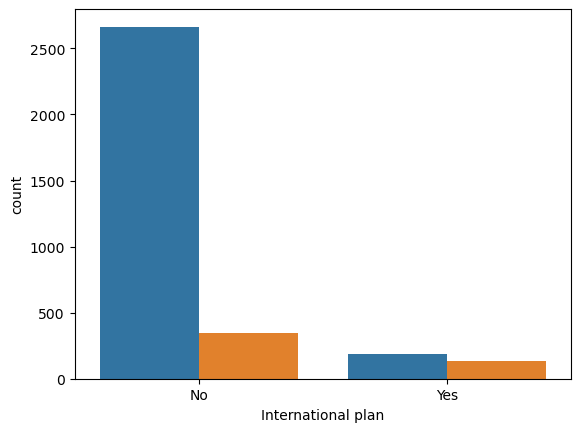

In [23]:
sns.countplot(data=df, x='International plan', hue='Churn')

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

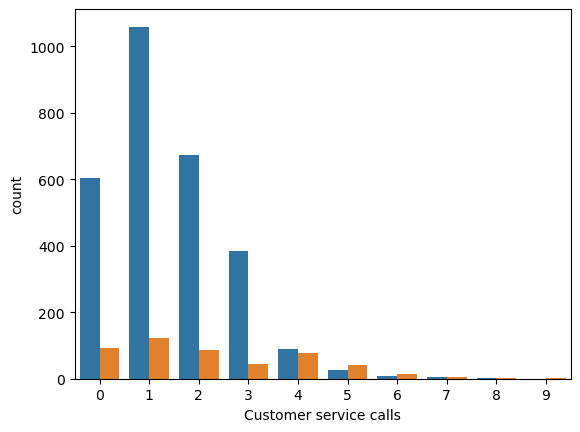

In [ ]:
sns.countplot(data=df, x='Customer service calls', hue='Churn')


In [27]:
# t-SNE сохраненеие соседства, гипотеза компактности
from sklearn.manifold import TSNE 

In [28]:
tsne = TSNE(random_state=0)

In [25]:
df2 = df.drop('State', axis=1)

In [29]:
df2['International plan'] = df2['International plan'].map({'Yes': 1, "No": 0})
df2['Voice mail plan'] = df2['Voice mail plan'].map({'Yes': 1, "No": 0})


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   int64  
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   int64  
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

In [31]:
tsne.fit(df2)

TSNE(random_state=0)

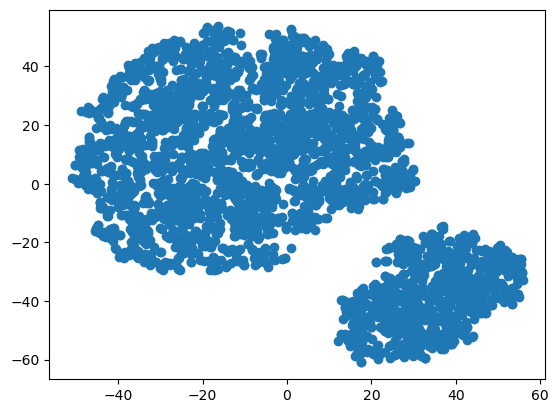

In [32]:
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1]);

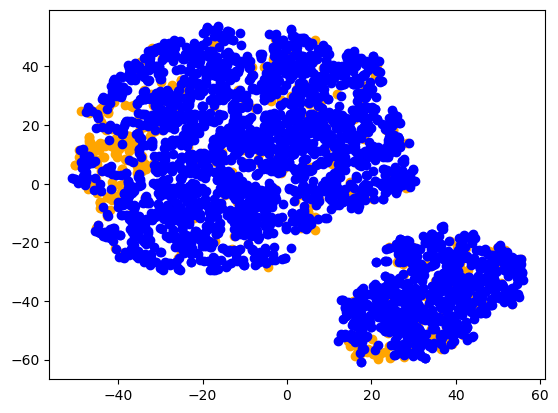

In [34]:
plt.scatter(tsne.embedding_[df2['Churn'].values, 0], 
            tsne.embedding_[df2['Churn'].values, 1],
            color='orange');

plt.scatter(tsne.embedding_[~df2['Churn'].values, 0], 
            tsne.embedding_[~df2['Churn'].values, 1],
            color='blue');
